In [1]:
import time, os
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import glob

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras

Using plaidml.keras.backend backend.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
#!pip install kaggle
# Create Kaggle Account and generate API Key if you haven't done yet...
# Download using:
#!kaggle datasets download -d slothkong/10-monkey-species

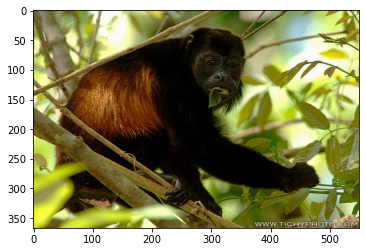

In [4]:
img = mpimg.imread('monkey_images/training/training/n0/n0018.jpg')
imgplot = plt.imshow(img)
plt.show()

In [5]:
fnames = glob.glob('monkey_images/training/training/*/*', recursive=True)

In [6]:
%%time
x = []
y = []
for f in fnames:
    x.append(cv2.resize(cv2.imread(f), dsize=(416,416)))
    y.append(int(f.split('/')[-2][1]))
    #y.append(0) #('n0 - mantled_howler')
    

CPU times: user 16.7 s, sys: 816 ms, total: 17.5 s
Wall time: 17.3 s


In [7]:
x = np.array(x)
y = np.array(y)

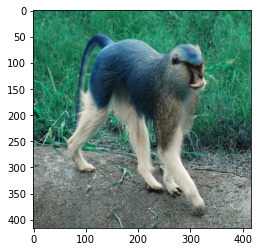

In [8]:
#Beispiel Bild plotten:
imgplot = plt.imshow(x[573])
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
CLF = "basc"
num_classes = 10
if CLF.lower() == "basic":
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(416, 416, 3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes)
    ])
    
else:
    model = keras.Sequential([
      #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
      keras.layers.Conv2D(32, 3, activation='relu'),
      keras.layers.MaxPooling2D(),
      keras.layers.Conv2D(32, 3, activation='relu'),
      keras.layers.MaxPooling2D(),
      keras.layers.Conv2D(32, 3, activation='relu'),
      keras.layers.MaxPooling2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
    ])

#model.summary()

In [ ]:
%%time
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=10)

INFO:plaidml:Opening device "llvm_cpu.0"


Epoch 1/10


In [ ]:
score = []
score.append(cv2.resize(cv2.imread('monkey_images/training/training/n1/n1018.jpg'), dsize=(416,416)))
score = np.array(score)
score = np.reshape(x_train[0], (1, 416, 416, 3))

In [ ]:
print("Probabilities: ", model.predict(score))
print(f'Predicted class: {np.argmax(model.predict(score))} with probability: ')

In [ ]:
np.histogram(y)